In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc_context({'axes.edgecolor': 'orange',
                'xtick.color': 'yellow', 'ytick.color': 'yellow','figure.facecolor':'white'})
train = np.loadtxt('./source/click.csv', delimiter=',', skiprows=1)
train_x = train[:, 0]
train_y = train[:, 1]


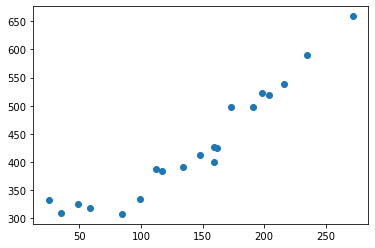

In [22]:
plt.plot(train_x, train_y, 'o')
plt.show()


In [23]:
theta0=np.random.rand()
theta1=np.random.rand()
theta0,theta1

(0.6612913356130357, 0.43274000162711457)

随机两个训练值$\theta_0$,$\theta_1$

In [24]:
def f(x):
    return theta0+theta1*x

def E(x,y):
    return 0.5*np.sum((y-f(x))**2)

In [25]:
mu=train_x.mean()
sigma=train_x.std()
def standaradize(x):
    return (x-mu)/sigma

In [26]:
train_z=standaradize(train_x)

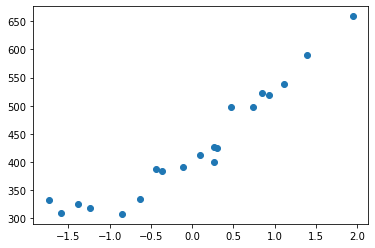

In [27]:
plt.plot(train_z,train_y,'o')
plt.show()

In [28]:
ETA = 1e-3
diff = 1
count = 0
error = E(train_z, train_y)
while diff > 1e-2:
    tmp0=theta0-ETA*np.sum((f(train_z)-train_y))
    tmp1=theta1-ETA*np.sum((f(train_z)-train_y)*train_z)
    theta0=tmp0
    theta1=tmp1
    current_error=E(train_z,train_y)
    diff=error-current_error
    error=current_error
    count+=1
    log='第{}次:theta0={:.3f},theta1={:.3f},差值={:.4f}'
    print(log.format(count,theta0,theta1,diff))

第1次:theta0=9.231,theta1=2.294,差值=76135.0142
第2次:theta0=17.629,theta1=4.117,差值=73120.0676
第3次:theta0=25.860,theta1=5.905,差值=70224.5129
第4次:theta0=33.926,theta1=7.656,差值=67443.6222
第5次:theta0=41.830,theta1=9.373,差值=64772.8548
第6次:theta0=49.577,theta1=11.055,差值=62207.8497
第7次:theta0=57.168,theta1=12.703,差值=59744.4189
第8次:theta0=64.608,theta1=14.319,差值=57378.5399
第9次:theta0=71.898,theta1=15.902,差值=55106.3497
第10次:theta0=79.044,theta1=17.453,差值=52924.1383
第11次:theta0=86.046,theta1=18.974,差值=50828.3424
第12次:theta0=92.908,theta1=20.464,差值=48815.5400
第13次:theta0=99.633,theta1=21.924,差值=46882.4446
第14次:theta0=106.223,theta1=23.355,差值=45025.8998
第15次:theta0=112.681,theta1=24.758,差值=43242.8742
第16次:theta0=119.011,theta1=26.132,差值=41530.4564
第17次:theta0=125.214,theta1=27.479,差值=39885.8503
第18次:theta0=131.292,theta1=28.799,差值=38306.3706
第19次:theta0=137.250,theta1=30.093,差值=36789.4384
第20次:theta0=143.088,theta1=31.360,差值=35332.5766
第21次:theta0=148.809,theta1=32.603,差值=33933.4066
第22次:theta0=154.416,

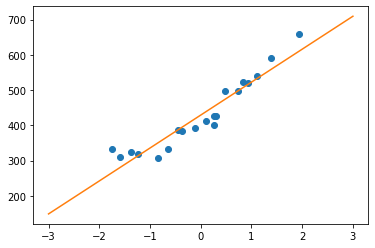

In [29]:
x=np.linspace(-3,3,100)
plt.plot(train_z,train_y,'o')
plt.plot(x,f(x))
plt.show()

In [30]:
theta=np.random.rand(3)
theta


array([0.04528188, 0.81515017, 0.79132527])

In [31]:
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]),x,x**2]).T

In [32]:
X=to_matrix(train_z)
def f(x):
    return np.dot(x,theta)

In [ ]:
diff=1
error=E(X,train_y)
while diff>1e-2:
    theta = theta - ETA*np.dot(f(X)-train_y,X)